### Mnist Kneighbour exercises 1 & 2 from Geron

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784',version = 1)
X,y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
# mnist784 is already in random order, so just take the final 10k out of 70 k as test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

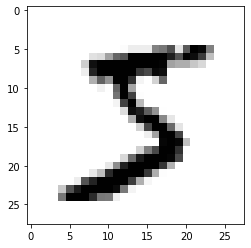

In [2]:
import matplotlib.pyplot as plt
sample_digit = X_train.iloc[0].to_numpy()
sample_digit_image = sample_digit.reshape(28,28)
plt.imshow(sample_digit_image, cmap="binary")
plt.show()

In [3]:
#performance gain from adding standard scaling:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))



In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



pl_knn = Pipeline (steps=[('classifier',KNeighborsClassifier())])

param_grid = {'classifier__n_neighbors':[3,4,5,6,7,8], 'classifier__weights':['uniform', 'distance']}

#grid_search = GridSearchCV(pl_knn,param_grid,cv=5,scoring="accuracy", return_train_score=True, n_jobs=5)
#grid_search.fit(X_train_scaled,y_train)
#print(f"best estimator: {grid_search.best_estimator_}")
#print(f"best score: {grid_search.best_score_}")

In [5]:
#grid_search.best_estimator_.score(X_test_scaled,y_test)

* best on 3-8 is 4 and distance

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pl_knn = Pipeline (steps=[('classifier',KNeighborsClassifier())])

param_grid = {'classifier__n_neighbors':[3,4,5], 'classifier__weights':['uniform', 'distance'], 'classifier__p':[1,2]}

#grid_search_2 = GridSearchCV(pl_knn,param_grid,cv=5,scoring="accuracy", return_train_score=True, n_jobs=5)
#grid_search_2.fit(X_train_scaled,y_train)
#print(f"best estimator: {grid_search_2.best_estimator_}")
#print(f"best score: {grid_search_2.best_score_}")

In [7]:
#y_pred = grid_search_2.predict(X_test_scaled)
#accuracy_score(y_test,y_pred)

* K nearest neighbour is NOT improved by using scaling - since its not regression / GD

In [8]:
#import joblib
#joblib.dump(grid_search.best_estimator_, "grid_best.pkl")

In [3]:
import joblib
best_unscaled = joblib.load( "grid_best_unscaled.pkl")
#print(best_unscaled.best_estimator_.named_steps["classifier"])
#print(best_unscaled.best_score_)
from sklearn.metrics import accuracy_score

y_pred = best_unscaled.predict(X_test)
accuracy_score(y_test,y_pred)

0.9714

In [4]:
best_unscaled.get_params()

{'memory': None,
 'steps': [('classifier',
   KNeighborsClassifier(n_neighbors=4, weights='distance'))],
 'verbose': False,
 'classifier': KNeighborsClassifier(n_neighbors=4, weights='distance'),
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 4,
 'classifier__p': 2,
 'classifier__weights': 'distance'}

## Data Augmentation
Adding modified training data (modifying location of the image in the grid)

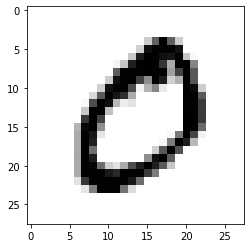

In [6]:
image = X_train.iloc[1].to_numpy().reshape(28,28)
plt.imshow(image, cmap="binary")
plt.show()

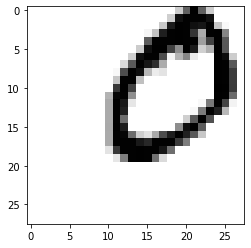

In [7]:
from scipy.ndimage.interpolation import shift
shift_image = shift(image,(-4,4))
plt.imshow(shift_image, cmap="binary")
plt.show()

In [12]:
from scipy.ndimage.interpolation import shift

shifted_X_train = []
shifted_y_train = []


for index in range(len(X_train)):
    for direction in [(0,1),(0,-1),(1,0),(-1,0)]:
        image = X_train.iloc[index].to_numpy().reshape(28,28)
        shifted_X_train.append(shift(image,direction).reshape(784))
        shifted_y_train.append(y_train[index])

#shifted_X_train = np.reshape(shifted_X_train,())


In [13]:
# import joblib
# joblib.dump(shifted_X_train, "s_X_t.pkl")
# joblib.dump(shifted_y_train, "s_y_t.pkl")

['s_y_t.pkl']

In [6]:
import joblib
shifted_X_train = joblib.load("s_X_t.pkl")
shifted_y_train = joblib.load("s_y_t.pkl")

In [7]:
import numpy as np
np.shape(shifted_X_train)


(240000, 784)

In [14]:
# import pandas as pd

# current_X_columns = X_train.columns
# #current_Y_columns = y_train.columns # ytrain is series so no columns
# current_X_train = X_train.to_numpy()

# new_data = np.append(current_X_train[:2],shifted_X_train[:2],axis=0)
# np.shape(new_data)


(4, 784)

In [15]:
# print(np.shape(current_X_columns))
# new_df = pd.DataFrame(new_data,columns=current_X_columns)

(784,)


In [6]:
# import pandas as pd
# shifted__df = pd.DataFrame(shifted_X_train,columns = X_train.columns)

In [7]:
#joblib.dump(shifted__df,"s_df.pkl")

['s_df.pkl']

In [8]:
shifted__df = joblib.load("s_df.pkl")

In [9]:
import pandas as pd
augmented_X_train = pd.concat([X_train,shifted__df])
augmented_y_train = y_train.append(pd.Series(shifted_y_train))

In [10]:
print(type(augmented_X_train))
print(type(augmented_y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


pl_knn = Pipeline (steps=[('classifier',KNeighborsClassifier())])

param_grid = {'classifier__n_neighbors':[4,5], 'classifier__weights':['distance']}

grid_search_aug = GridSearchCV(pl_knn,param_grid,cv=5,scoring="accuracy", return_train_score=True, n_jobs=3)
grid_search_aug.fit(augmented_X_train,augmented_y_train)
print(f"best estimator: {grid_search_aug.best_estimator_}")
print(f"best score: {grid_search_aug.best_score_}")


best estimator: Pipeline(steps=[('classifier',
                 KNeighborsClassifier(n_neighbors=4, weights='distance'))])
best score: 0.9845466666666667


In [12]:
y_pred = grid_search_aug.predict(X_test)
accuracy_score(y_test,y_pred)

0.9763

### so augmenting the training set with images shifted by 1 pixel in either direction has improved the performance of hyper parameter tuned KNN regression from 97.1% accuracy to 97.6% accuracy

* This has inflated the training set by a factor of 4 leading to slower training and tuning